<a href="https://colab.research.google.com/github/BhavikDudhrejiya/Feature-Selection-Methods/blob/main/Feature_Selection_using_F_Score_%26_Chi2_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import chi2, SelectKBest, SelectPercentile
from sklearn.metrics import accuracy_score

In [2]:
#Loading data
titanic = sns.load_dataset('titanic')

In [3]:
#Checking data
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
#Checking features have object data type
titanic.select_dtypes(include=['O']).keys()

Index(['sex', 'embarked', 'who', 'embark_town', 'alive'], dtype='object')

In [5]:
#Checking missing values
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [6]:
#Removing missing values
titanic = titanic.drop(columns = ['age', 'deck'],axis = 1) #Drop features
titanic.dropna(axis = 0, inplace = True) #Drop rows

In [7]:
#Checking missing values
titanic.isnull().sum()

survived       0
pclass         0
sex            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [8]:
#Checking data
titanic.head()

,survived,pclass,sex,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [9]:
#Checking columns
titanic.columns

Index(['survived', 'pclass', 'sex', 'sibsp', 'parch', 'fare', 'embarked',
       'class', 'who', 'adult_male', 'embark_town', 'alive', 'alone'],
      dtype='object')

In [10]:
#Creating new data have only object variables
data = titanic[[ 'pclass', 'sex', 'sibsp', 'parch', 'embarked', 'who', 'alone']].copy()

In [11]:
#Checking data
data.head()

,pclass,sex,sibsp,parch,embarked,who,alone
0,3,male,1,0,S,man,False
1,1,female,1,0,C,woman,False
2,3,female,0,0,S,woman,True
3,1,female,1,0,S,woman,False
4,3,male,0,0,S,man,True


In [12]:
#Label encoding manually
sex = {'male':0, 'female':1}
data['sex'] = data['sex'].map(sex)
ports = {'S':0, 'C':1, 'Q':2}
data['embarked'] = data['embarked'].map(ports)
who = {'man':0, 'woman':1, 'child':2}
data['who'] = data['who'].map(who)
alone = {True:1, False:0}
data['alone'] = data['alone'].map(alone)

In [13]:
#Checking data
data.head()

,pclass,sex,sibsp,parch,embarked,who,alone
0,3,0,1,0,0,0,0
1,1,1,1,0,1,1,0
2,3,1,0,0,0,1,1
3,1,1,1,0,0,1,0
4,3,0,0,0,0,0,1


In [14]:
#Splitting data into X & y
X = data.copy()
y = titanic['survived']

#Checking shape of the data
X.shape, y.shape

((889, 7), (889,))

In [15]:
#Splitting data into train, test and split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#Checking shape of the data
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((711, 7), (178, 7), (711,), (178,))

#Chi2 Test

In [16]:
#Implementing chi2 test on the data
f_score = chi2(X_train, y_train)

In [17]:
#Extracting f scores
f_score

(array([ 22.65169202, 152.91534343,   0.52934285,  10.35663782,
         16.13255653, 161.42431175,  13.4382363 ]),
 array([1.94189138e-06, 3.99737147e-35, 4.66883271e-01, 1.29009955e-03,
        5.90599986e-05, 5.52664700e-37, 2.46547298e-04]))

In [19]:
#Conerting into series
p_values = pd.Series(f_score[1], index = X_train.columns)
p_values.sort_values(ascending = False, inplace = True)
p_values

sibsp       4.668833e-01
parch       1.290100e-03
alone       2.465473e-04
embarked    5.906000e-05
pclass      1.941891e-06
sex         3.997371e-35
who         5.526647e-37
dtype: float64

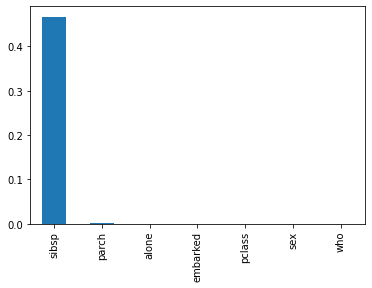

In [20]:
#Visualizing the p_values
p_values.plot.bar();

In [25]:
#Creating function who train a model and extract accuracy
def rfc(X_train, X_test, y_train, y_test):
  rf = RandomForestClassifier(n_estimators=100, random_state=0)
  rf.fit(X_train, y_train)
  y_pred = rf.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  print('Accuracy:',accuracy)

In [26]:
#Creating data adding features from lower p value to high p values one by one
X_train_2 = X_train[['who', 'sex']]
X_test_2 = X_test[['who', 'sex']]

#Train a model and extract accuracy
rfc(X_train_2, X_test_2, y_train, y_test)

Accuracy: 0.7191011235955056


In [27]:
#Creating data adding features from lower p value to high p values one by one
X_train_3 = X_train[['who', 'sex', 'pclass']]
X_test_3 = X_test[['who', 'sex', 'pclass']]

#Train a model and extract accuracy
rfc(X_train_3, X_test_3, y_train, y_test)

Accuracy: 0.7415730337078652


In [28]:
#Creating data adding features from lower p value to high p values one by one
X_train_4 = X_train[['who', 'sex', 'pclass', 'embarked']]
X_test_4 = X_test[['who', 'sex', 'pclass', 'embarked']]

#Train a model and extract accuracy
rfc(X_train_4, X_test_4, y_train, y_test)

Accuracy: 0.7584269662921348


In [29]:
#Creating data adding features from lower p value to high p values one by one
X_train_5 = X_train[['who', 'sex', 'pclass', 'embarked', 'alone']]
X_test_5 = X_test[['who', 'sex', 'pclass', 'embarked','alone']]

#Train a model and extract accuracy
rfc(X_train_5, X_test_5, y_train, y_test)

Accuracy: 0.7528089887640449


In [30]:
#Creating data adding features from lower p value to high p values one by one
X_train_6 = X_train[['who', 'sex', 'pclass', 'embarked', 'alone', 'sex']]
X_test_6 = X_test[['who', 'sex', 'pclass', 'embarked','alone', 'sex']]

#Train a model and extract accuracy
rfc(X_train_6, X_test_6, y_train, y_test)

Accuracy: 0.7528089887640449


In [31]:
#Train a model and extract accuracy on original data
rfc(X_train, X_test, y_train, y_test)

Accuracy: 0.7359550561797753


In [129]:
#Alternative ways of extracting accuracy adding features from lower p value to high p values
for i in reversed(range(len(X_train.columns))):
  X_train_new = X_train.iloc[:,i:8]
  X_test_new = X_test.iloc[:,i:8]
  print(list(X_train.iloc[:,i:8].keys()))
  rfc(X_train_new, X_test_new, y_train, y_test)

['alone']
Accuracy: 0.5955056179775281
['who', 'alone']
Accuracy: 0.7191011235955056
['embarked', 'who', 'alone']
Accuracy: 0.7191011235955056
['parch', 'embarked', 'who', 'alone']
Accuracy: 0.7359550561797753
['sibsp', 'parch', 'embarked', 'who', 'alone']
Accuracy: 0.7584269662921348
['sex', 'sibsp', 'parch', 'embarked', 'who', 'alone']
Accuracy: 0.7528089887640449
['pclass', 'sex', 'sibsp', 'parch', 'embarked', 'who', 'alone']
Accuracy: 0.7359550561797753


As We got highest accuracy on 75.84% while selecting 'sibsp', 'parch','embarked', 'who', 'alone' features based on lower to higher p values